## Breast Cancer Diagnosis

---

A typical classification task to determine whether the cancer is benign or malignant.

The dataset is from UCI-ML: WDBC (Wisconsin Diagnostic Breast Cancer).

There are some features in dataset, i.e.:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)




#### Load data

read data and set the corresponding attribute names

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data as DataFrame
data = pd.read_csv('/Users/linjliang/Learning/20spring/BD/mini-project/resource/dataset/wdbc.data',header=None)
data.columns = ['id','diagnosis',
                'radius_m','texture_m','perimeter_m','area_m','smoothness_m','compactness_m','concavity_m','concave_points_m','symmetry_m','fractal_dimension_m',
                'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
                'radius_w','texture_w','perimeter_w','area_w','smoothness_w','compactness_w','concavity_w','concave_points_w','symmetry_w','fractal_dimension_w'
                ] # m: mean; se: standard error; w: worst case


#### Data Exploration

know more info about the categories and attributes

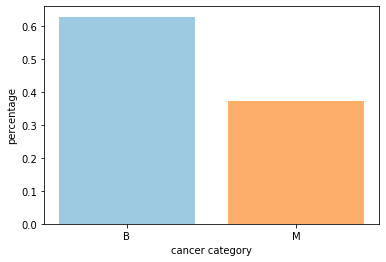

In [3]:
# drop records with missing value
data = data.dropna(axis=0)

# the label distribution
cmap = plt.get_cmap("tab20c")   # Qualitative Colormap
plt.bar(data['diagnosis'].value_counts().index, data['diagnosis'].value_counts().values/data.shape[0],
         color=cmap([2,6]))
plt.xlabel('cancer category')
plt.ylabel('percentage')
plt.show()

Notice that it is an unbalanced dataset, we need to handle this problem or it may affect the performance of the model. 

The basic theoretical concepts behind over- and under-sampling are very simple:

- With **under-sampling**, we randomly select a subset of samples from the class with more instances to match the number of samples coming from each class.

Disadvantage: lose potentially relevant information from the left-out samples.

- With **over-sampling**, we randomly duplicate samples from the class with fewer instances or we generate additional instances based on the data that we have, so as to match the number of samples in each class.

Disadvantage: run the risk of overfitting our model as we are more likely to get the same samples in the training and in the test data, i.e. the test data is no longer independent from training data. This would lead to an overestimation of our model’s performance and generalizability.

In reality though, we should not simply perform over- or under-sampling on our training data and then run the model. We need to account for cross-validation and perform over- or under-sampling on each fold independently to get an honest estimate of model performance!

> **TO DO later in experiment: compare different sampling methods through their performance**

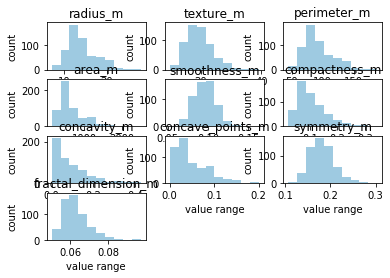

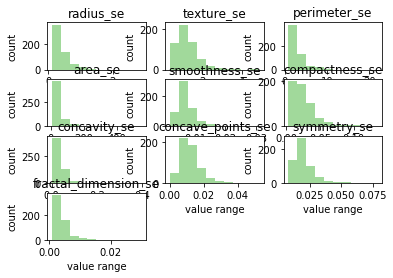

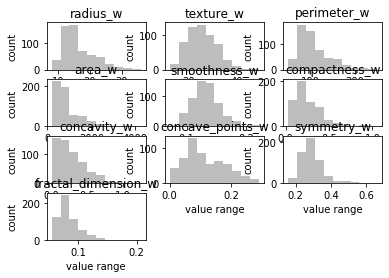

In [4]:
# the attributes distributions
# 3*4 to present 10 mean features
for i in range(2,12):
    plt.subplot(4,3,i-1)
    plt.hist(data.iloc[:,i],color=cmap([2]))
    plt.title(data.columns[i])
    plt.xlabel('value range')
    plt.ylabel('count')
plt.show()

# 3*4 to present 10 standard error features
for i in range(12,22):
    plt.subplot(4,3,i-11)
    plt.hist(data.iloc[:,i],color=cmap([10]))
    plt.title(data.columns[i])
    plt.xlabel('value range')
    plt.ylabel('count')
plt.show()

# 3*4 to present 10 worst features
for i in range(22,32):
    plt.subplot(4,3,i-21)
    plt.hist(data.iloc[:,i],color=cmap([18]))
    plt.title(data.columns[i])
    plt.xlabel('value range')
    plt.ylabel('count')
plt.show()

After observing the distributions of all features, we consider the relation between them: compute the correlation to see whether some of them are very relavant. 

> **TO DO later in experiment: compare performance by reducing highly-relevant attributes**

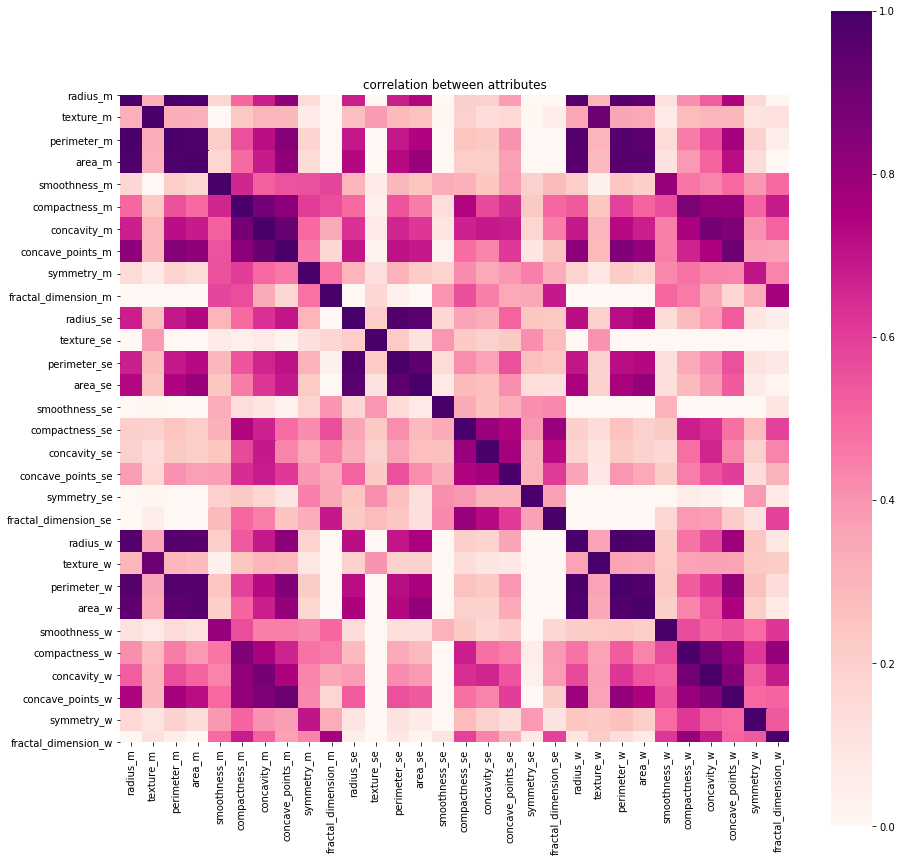

In [5]:
# correlation between attributes
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(data.iloc[:,2:32].corr(), vmin=0,vmax=1, square=True, cmap="RdPu")
plt.title('correlation between attributes')
plt.show()